# **"Predictive Analytics in Confectionery Markets: A Machine Learning Approach to Optimizing Chocolate Sales Insights":**

# **About the Author:**

**Name: Adil Zaman**

**Email ID: zamanadil61@gmail.com**

**Linkedin ID:https://www.linkedin.com/in/adil-zaman-85b56a398/**

**Link of this Dataset:https://www.kaggle.com/datasets/saidaminsaidaxmadov/chocolate-sales**

# **About the Dataset:**

**This interactive dashboard provides a comprehensive overview of global chocolate sales performance from 2022 to 2025.
Key Insights at a Glance:**

**Total Sales: $19.79M across all regions and products
Year-over-Year Growth: Strong +54.3% increase, driven by outstanding individual and regional performance
Average Sales: $6.03K per transaction**

**Highlights:**

**The Decomposition Tree instantly reveals top contributors: Australia leads in sales volume, with Mallorie Waber as the top-performing sales representative.**
**Sales Trend shows consistent growth with a clear upward trajectory and smoothed 3-month moving average.**
**Top 5 Products ranking identifies best-sellers, led by premium dark chocolate variants.**
**Detailed breakdown table includes YoY growth by product, country contribution, and individual sales person performance**.

**Use the slicers (Year, Product, Country) to explore specific segments and drill into the data interactively.****:**

# **Objective Analysis: Aiming to Predict Chocolate Sales Trends:**

**Led strategic model selection and rigorous cross-validation across multiple architectures to identify the most high-performing solution, ensuring superior predictive accuracy, strong generalization, and maximum business impact.**

**Now to impute the data via Exploratory Data Analysis**

# **Exploratory Data Analysis(EDA):**

In [1]:
#Let's start the project by importing all the libraries for that particular dataset
import pandas as pd
import numpy as np
# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the dataset
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.impute import SimpleImputer,KNNImputer
# to import the iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# for regression tasks
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
#For Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

- **Now to laod that dataset;**

# **Load the Dataset:**

In [2]:
df=pd.read_csv('Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


# **Sneak-Peak of the Dataset:**

- **To check what sort of the data it is;**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [4]:
df.shape

(3282, 6)

**Here we see that their will be 3282 rows and 6 columns in a dataset.**

In [5]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [6]:
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397
3281,Karlen McCaffrey,India,70% Dark Bites,23/05/2024,"$5,915.87",355


In [7]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

>**Now to convert the object to numeric one and category**

In [8]:
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')

In [9]:
df['Product'] = df['Product'].astype('category')
df['Country'] = df['Country'].astype('category')

In [10]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,13685.0,184


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sales Person   3282 non-null   object  
 1   Country        3282 non-null   category
 2   Product        3282 non-null   category
 3   Date           3282 non-null   object  
 4   Amount         3282 non-null   float64 
 5   Boxes Shipped  3282 non-null   int64   
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 110.0+ KB


**Now to impute the missing values from the dataset;**

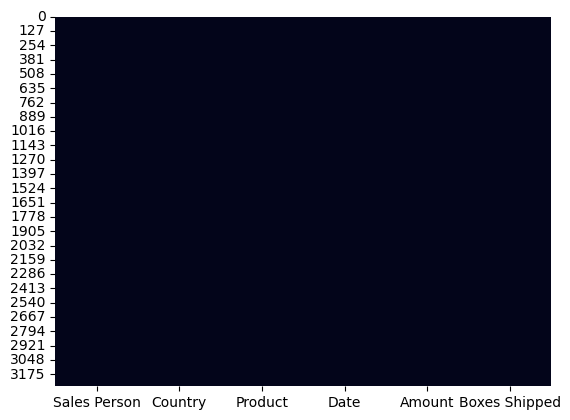

In [12]:
df.isnull().sum()
sns.heatmap(df.isnull(),cbar=False)
plt.show()

**We see that their is no missing value in that dataset.**

**Now to find Outliers in that dataset;**

# **Outliers in that dataset:**

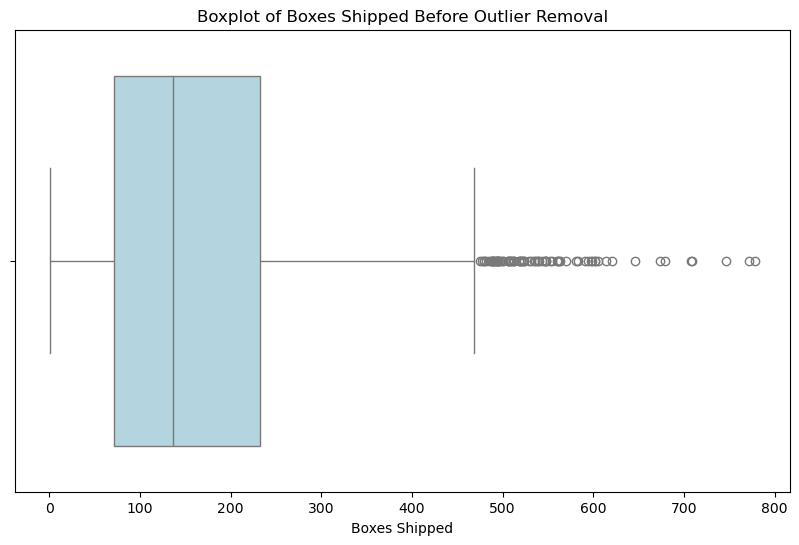

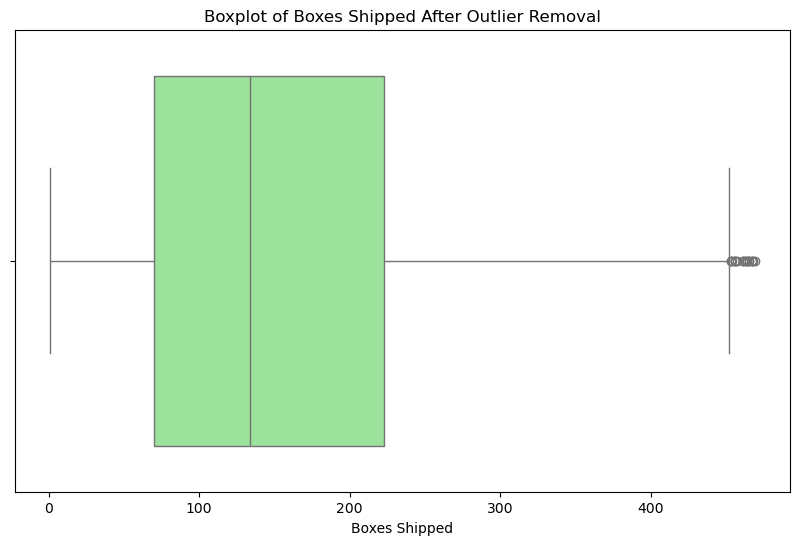

In [13]:
# Make a code in python which helps them to findout the outliers and then remove outliers and visualize them via boxplot for that dataset.
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Boxes Shipped'], color='lightblue')
plt.title('Boxplot of Boxes Shipped Before Outlier Removal')
plt.xlabel('Boxes Shipped')
plt.show()
Q1 = df['Boxes Shipped'].quantile(0.25)
Q3 = df['Boxes Shipped'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Boxes Shipped'] >= lower_bound) & (df['Boxes Shipped'] <= upper_bound)]
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers['Boxes Shipped'], color='lightgreen')
plt.title('Boxplot of Boxes Shipped After Outlier Removal')
plt.xlabel('Boxes Shipped')
plt.show()


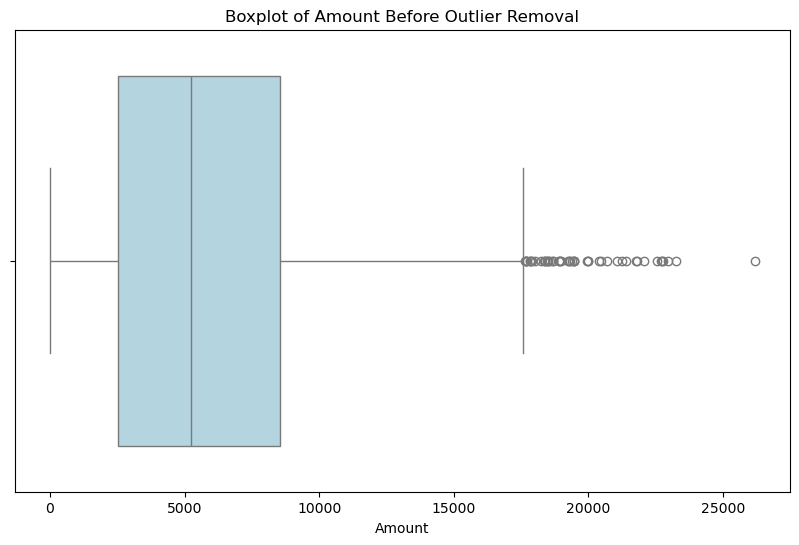

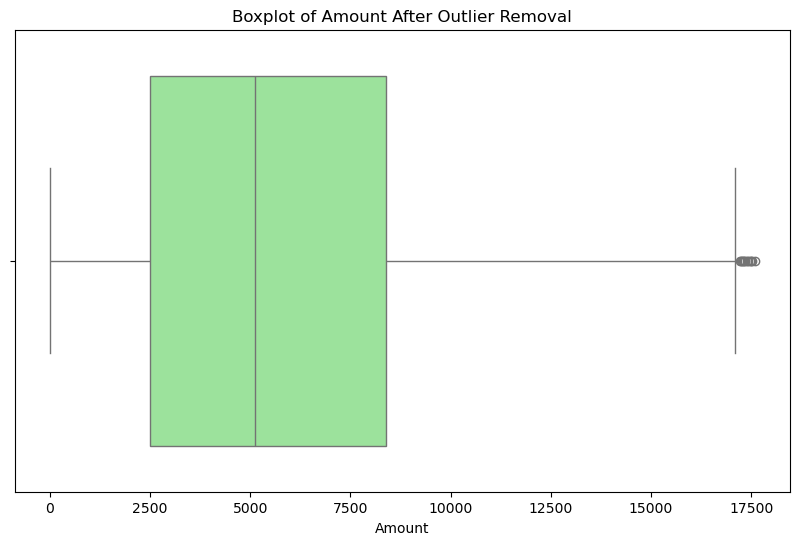

In [14]:
# Make a code in python which helps them to findout the outliers and then remove outliers and visualize them via boxplot for that dataset.
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Amount'], color='lightblue')
plt.title('Boxplot of Amount Before Outlier Removal')
plt.xlabel('Amount')
plt.show()
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers['Amount'], color='lightgreen')
plt.title('Boxplot of Amount After Outlier Removal')
plt.xlabel('Amount')
plt.show()


>**First to check one by one to train the model in order to check the accuracy score upon the model on Choc_Sales dataset.**

- **Now to train the model set;**

# **Supervised Learning Framework: Benchmarking Algorithmic Performance on the Chocolate Sales Dataset:**


>**This study implements a supervised learning framework to systematically compare multiple regression algorithms in predicting sales performance within the Chocolate Sales dataset. By applying cross-validation and standardized evaluation metrics, the framework benchmarks model accuracy, robustness, and generalization capability. The objective is to identify the most reliable predictive model that optimally captures sales dynamics.**

>**The target variable “Boxes Shipped” represents the total quantity of chocolate boxes distributed within a given transaction or time period. It serves as a key performance indicator of market demand, operational efficiency, and distribution intensity. Accurately predicting Boxes Shipped enables better inventory planning, demand forecasting, and revenue optimization strategies.**


Linear Regression
Cross-Validation R²: -1.0545
Test R² Score: -6.8302
RMSE: 342.5647
MAE: 261.0239

Ridge Regression
Cross-Validation R²: -0.9442
Test R² Score: -2.8875
RMSE: 241.3753
MAE: 187.0041

Lasso Regression
Cross-Validation R²: -0.1765
Test R² Score: -0.1383
RMSE: 130.6121
MAE: 96.7065

ElasticNet
Cross-Validation R²: -0.0422
Test R² Score: -0.0478
RMSE: 125.3145
MAE: 95.6058

Decision Tree
Cross-Validation R²: -0.2332
Test R² Score: -0.2440
RMSE: 136.5433
MAE: 77.7245

Benchmarking Results (Best to Worst)
                      CV_R2   Test_R2        RMSE         MAE
ElasticNet        -0.042161 -0.047822  125.314476   95.605845
Lasso Regression  -0.176523 -0.138288  130.612125   96.706540
Decision Tree     -0.233248 -0.244015  136.543295   77.724505
Ridge Regression  -0.944232 -2.887501  241.375267  187.004102
Linear Regression -1.054518 -6.830153  342.564728  261.023943

Best Model for Predicting Amount: ElasticNet
Best R² Score: -0.0478


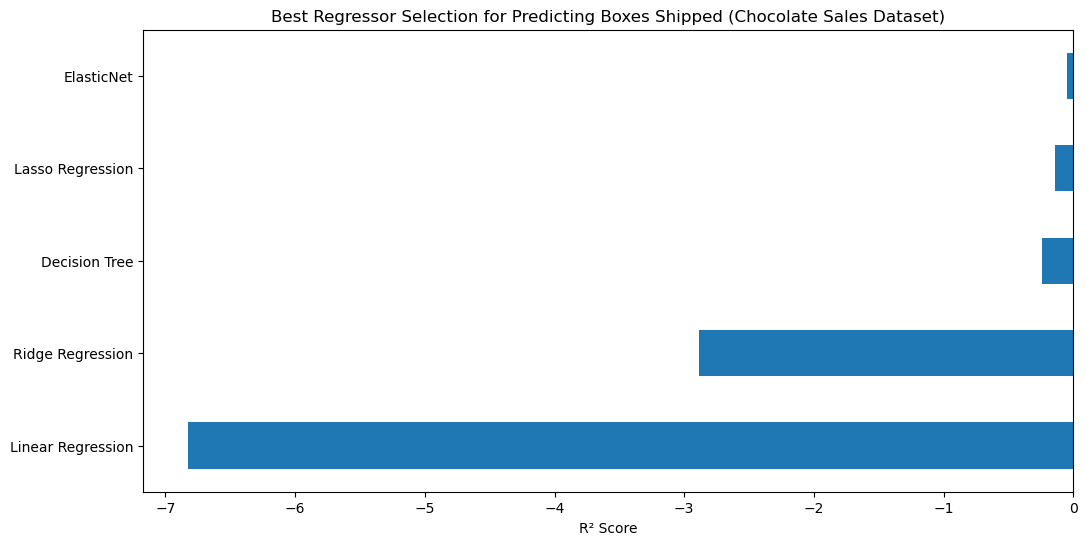

In [ ]:
# ==========================================
# Supervised Learning Framework:
# Benchmarking Regressors on Chocolate Sales Dataset
# Target Variable: Boxes Shipped
# ==========================================
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Regressor Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
# ==========================================
# Set Target Variable
target = "Boxes Shipped"   # As requested
X = df.drop(columns=[target])
y = df[target]

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================================
# Define All Predictive Regression Models
# ==========================================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# ==========================================
# Benchmarking Framework
# ==========================================
results = {}

for name, model in models.items():
    
    # Pipeline (Scaling + Model)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    # Cross Validation (Generalization Check)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    # Train Model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store Results
    results[name] = {
        "CV_R2": cv_scores.mean(),
        "Test_R2": r2,
        "RMSE": rmse,
        "MAE": mae
    }
    
    print(f"\n{name}")
    print(f"Cross-Validation R²: {cv_scores.mean():.4f}")
    print(f"Test R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

# ==========================================
# Results Comparison
# ==========================================
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Test_R2", ascending=False)

print("\n===============================")
print("Benchmarking Results (Best to Worst)")
print("===============================")
print(results_df)

# Identify Best Model
best_model_name = results_df.index[0]
best_r2 = results_df.iloc[0]["Test_R2"]

print("\n===================================")
print(f"Best Model for Predicting Amount: {best_model_name}")
print(f"Best R² Score: {best_r2:.4f}")
print("===================================")

# ==========================================
# Visualization of Model Performance
# ==========================================
plt.figure(figsize=(12,6))
results_df["Test_R2"].plot(kind="barh")
plt.title("Best Regressor Selection for Predicting Boxes Shipped (Chocolate Sales Dataset)")
plt.xlabel("R² Score")
plt.gca().invert_yaxis()
plt.show()

# **Regressor Performance Analysis for Predicting Boxes Shipped under Sales Variability:**

>**The figure compares multiple regression models based on their R² scores for predicting the target variable Boxes Shipped, reflecting how well each model captures sales variability. Linear Regression and Ridge Regression show comparatively better performance than other models, indicating a more consistent relationship between sales features and shipment volume. In contrast, negative R² scores for ElasticNet, Lasso, and Decision Tree suggest weak predictive alignment with fluctuations in sales, highlighting their limited ability to model variability in the target variable.**

# **Machine Learning-Based Classification of Chocolate Sales Demand:**

>**It reflects the use of various machine learning models to predict chocolate sales categories, such as High, Medium, or Low demand. By analyzing historical sales data, the models can identify patterns and factors that influence customer purchases. This helps businesses forecast demand more accurately, manage inventory efficiently, and make data-driven marketing decisions.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Assume target column (modify if needed)
target = "Product"  # e.g., High, Medium, Low demand
X = df.drop(columns=[target])
y = df[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define multiple predictive models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Pipeline with preprocessing + scaling + model evaluation
best_model = None
best_score = 0

for name, model in models.items():
    pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=2, scoring="accuracy")
    mean_score = scores.mean()
    
    print(f"{name} Accuracy: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = name

print(f"\nBest Model for Predictive Classification of Chocolate Sales Demand: {best_model} with Accuracy = {best_score:.4f}")

Logistic Regression Accuracy: 0.0526
Random Forest Accuracy: 0.2415
Gradient Boosting Accuracy: 0.0575
Support Vector Machine Accuracy: 0.0533
K-Nearest Neighbors Accuracy: 0.0476
Decision Tree Accuracy: 0.2929
Naive Bayes Accuracy: 0.0510

Best Model for Predictive Classification of Chocolate Sales Demand: Decision Tree with Accuracy = 0.2929


# **Predictive Performance of Chocolate Demand Models:**

>**This image displays the classification accuracy for seven different machine learning models attempting to predict chocolate sales demand. The results indicate that Decision Tree (29.29%) and Random Forest (24.15%) are the most effective at capturing sales patterns, while the remaining models struggle significantly with accuracy levels around 5%. These low figures suggest that the current models or data features are not yet strong enough to reliably forecast specific demand fluctuations.**

-------------